In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier



from sklearn.preprocessing import StandardScaler


from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
import numpy as np


In [2]:
#read the file
def read_file(fileType, fileName):
    df = pd.DataFrame({'A' : []})
    if fileType == 'csv' :
        df= pd.read_csv(fileName)
    elif fileType == 'json' :
        df= pd.read_json(fileName)
    return df

# removing null value features
def null_handling(df, nullPer) :
    tempDF = df.copy()
    for feature in tempDF.columns:
        if(100 * (tempDF[feature].isnull().sum()/len(tempDF)) > nullPer ) :
            tempDF.drop(feature, axis=1, inplace=True )
        elif (100 * (tempDF[feature].isnull().sum()/len(tempDF)) > 0 ) :
            tempDF[feature] = tempDF[feature].fillna(tempDF[feature].mean())
    return tempDF

# drop features having same value for all the rows
def drop_same_value(df):
    tempDF = df.copy()
    for feature in tempDF.columns:
        if( tempDF[feature].value_counts().max() - tempDF[feature].count() == 0):
            tempDF.drop(feature, axis=1, inplace=True )
    return tempDF

# drop highly correlated features
def drop_high_correlation_features1(df, threshold):
    tempDF = df.copy()
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = tempDF.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the column name
                col_corr.add(colname)
                if colname in tempDF.columns:
                    del tempDF[colname] # deleting the column from the dataset

    return tempDF

#Uni variat analysis - box plot
def box_plot(df):
    plt.figure(figsize = (20,10))
    plt.subplots_adjust(hspace=0.9)
    plt.subplots_adjust(wspace=0.2)
    j=1
    for i in range(30, 90, 9):
        plt.subplot(4,4,j)
        sns.boxplot(x=df[df.columns[i]]);
        j += 1
    plt.show()

def violin_plot(df):
    plt.figure(figsize = (20,10))
    plt.subplots_adjust(hspace=0.9)
    plt.subplots_adjust(wspace=0.2)
    j=1
    for i in range(20, 80, 9):
        plt.subplot(4,4,j)
        sns.violinplot(data=df, x=df[df.columns[i]]);
        j += 1
    plt.show()

def hist_plot(df):
    plt.figure(figsize = (20,10))
    plt.subplots_adjust(hspace=0.9)
    plt.subplots_adjust(wspace=0.2)
    j=1
    for i in range(140, 200, 9):
        plt.subplot(4,4,j)
        sns.histplot(data=df[df.columns[i]]);
        j += 1
    plt.show()

def joint_plot(df):
    j=1
    for i in range(140, 160, 9):
        sns.jointplot(x = df[df.columns[i]], y = df[df.columns[i+1]], kind = "reg", data = df);
        j += 1
    plt.show()

1. Import and understand the data. [5 Marks]
A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]


In [3]:
sigDF = read_file('csv', 'signal-data.csv')

In [4]:
sigDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


B. Print 5 point summary and share at least 2 observations. [3 Marks]

In [5]:
sigDF['Pass/Fail'] = sigDF['Pass/Fail'].replace(-1, 0) 

In [6]:
sigDF.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,0.066369
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,0.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,0.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,0.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [7]:
sigDF.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


2. Data cleansing: [15 Marks]  
A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]


In [8]:
signalDF_no_nulls = null_handling(sigDF, 20)

In [9]:
signalDF_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 560 entries, Time to Pass/Fail
dtypes: float64(558), int64(1), object(1)
memory usage: 6.7+ MB


B. Identify and drop the features which are having same value for all the rows. [3 Marks]


In [10]:
signalDF_no_same_value = drop_same_value(signalDF_no_nulls)

In [11]:
signalDF_no_same_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 444 entries, Time to Pass/Fail
dtypes: float64(442), int64(1), object(1)
memory usage: 5.3+ MB


C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]

In [12]:
for feature in signalDF_no_same_value.columns:
    if(signalDF_no_same_value[feature].dtype != 'object'and signalDF_no_same_value[feature].std() <= 0.001):
        print(feature, signalDF_no_same_value[feature].std(), signalDF_no_same_value[feature].var())

94 0.00017380088505989034 3.020674764760121e-08
95 0.00010420776652791029 1.0859258604735461e-08
100 0.0003548549327948784 1.2592202332885767e-07
101 0.00022033905121793666 4.8549297491620516e-08
104 0.0008501652283771184 7.227809155415178e-07
278 0.0003390554217932171 1.1495857904737638e-07
357 0.0004990015038987088 2.4900250089317304e-07
376 0.0005340087438642687 2.851653385234941e-07
377 0.00046624204474299404 2.1738164428612806e-07
544 0.0002953313847498962 8.722062681829122e-08


#Write about PCA

D. Check for multi-collinearity in the data and take necessary action. [3 Marks]


In [17]:
signalDF = drop_high_correlation_features1(signalDF_no_same_value,0.70)

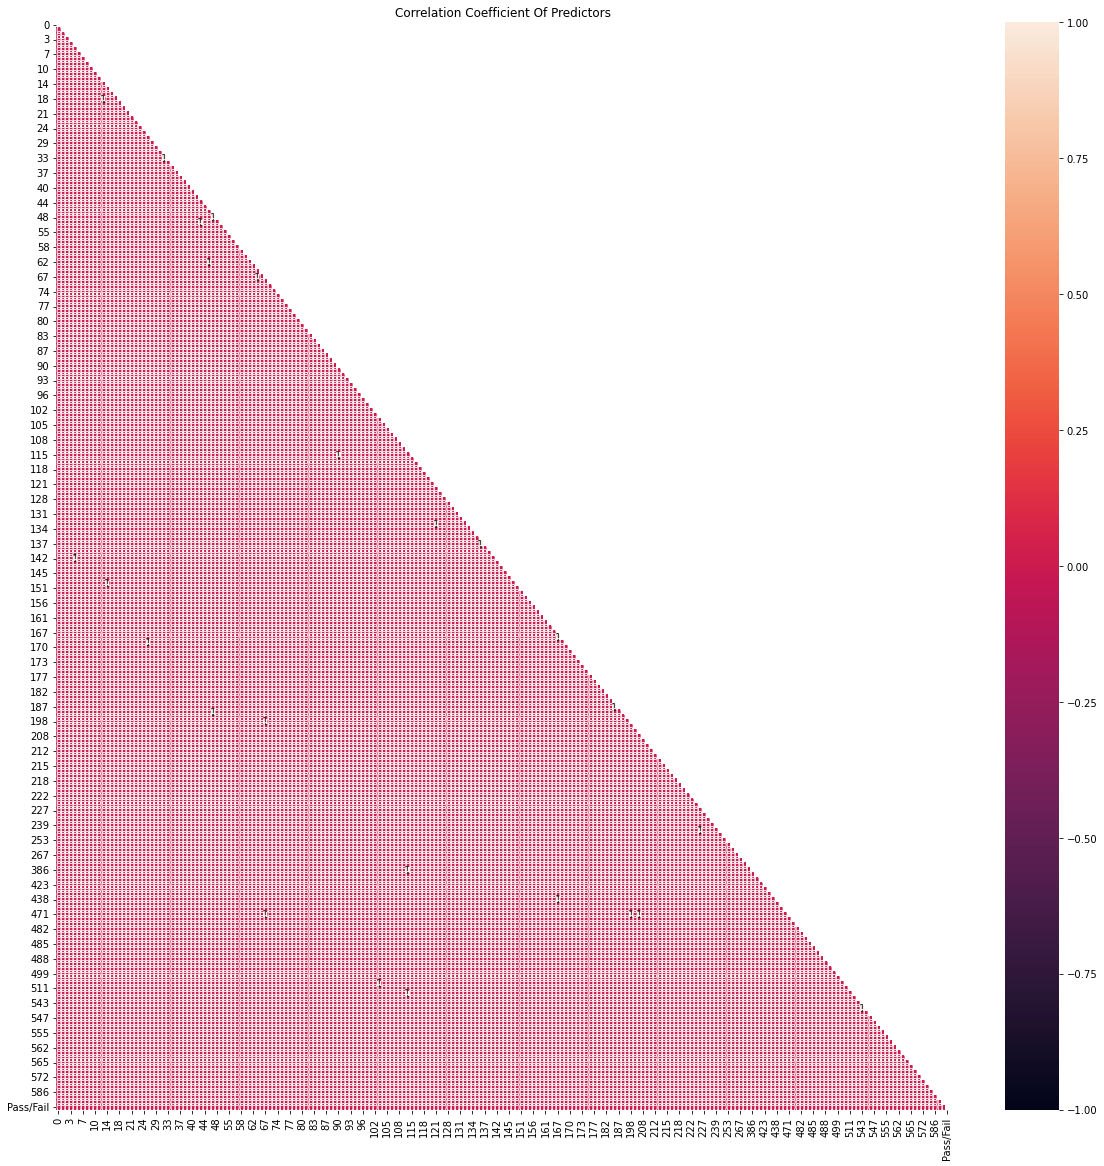

In [19]:
# set figure size
plt.figure(figsize=(20,20))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(signalDF.corr(), dtype=bool))

# generate heatmap
sns.heatmap(signalDF.corr()>0.6, annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [ ]:
sns.heatmap(signalDF_no_same_value.corr()>0.9, annot=True);

E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]


3. Data analysis & visualisation: [5 Marks]
A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]


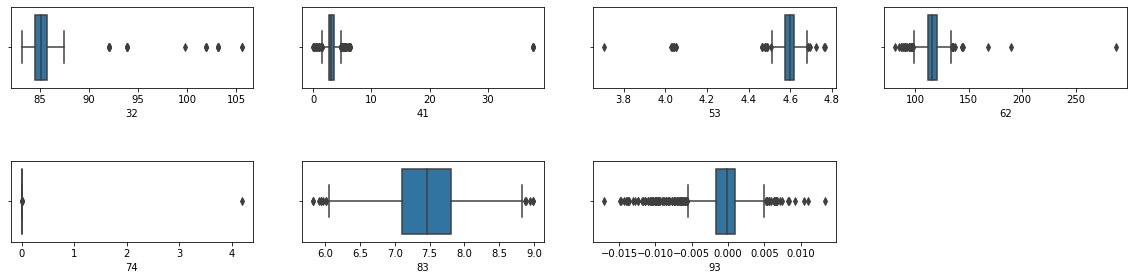

In [357]:
box_plot(signalDF)

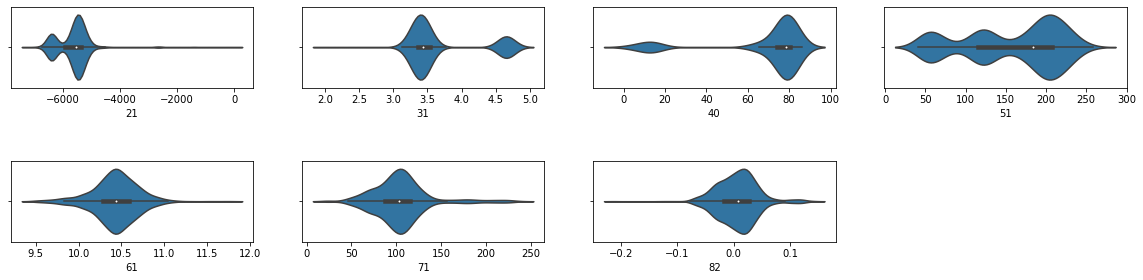

In [358]:
violin_plot(signalDF)

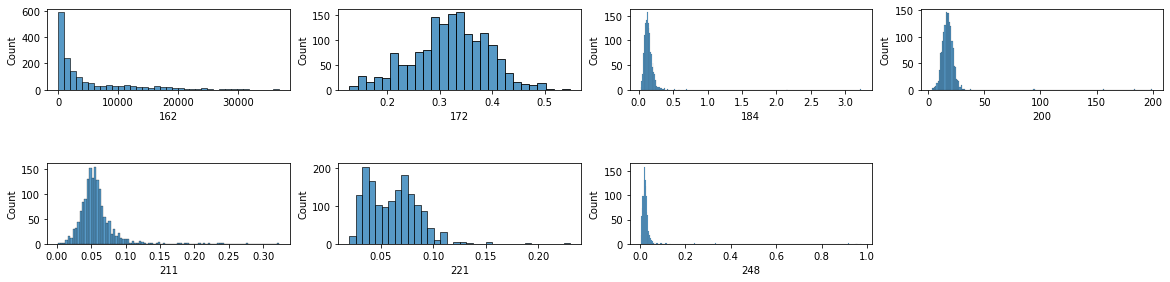

In [359]:
hist_plot(signalDF)

B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]


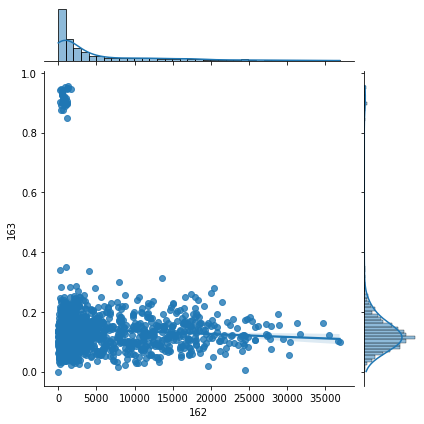

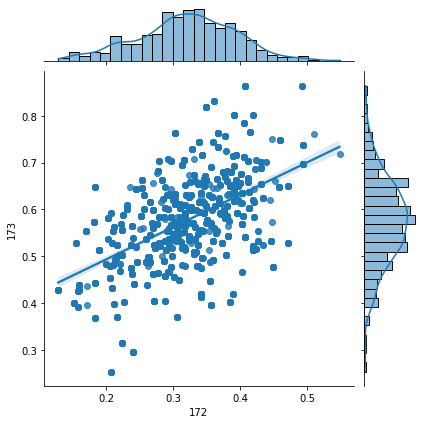

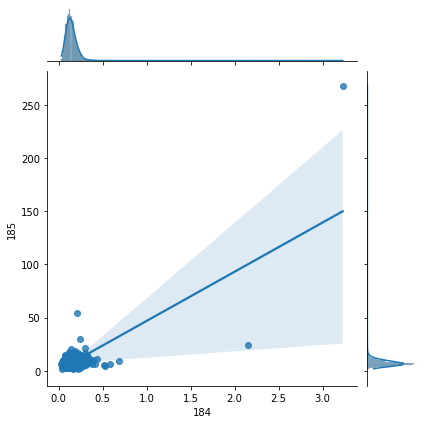

In [360]:
joint_plot(signalDF)

In [ ]:
#sns.corr(signalDF);

4. Data pre-processing: [10 Marks]
A. Segregate predictors vs target attributes. [2 Marks]

In [23]:
X = signalDF.drop(['Pass/Fail','Time'], axis=1)
y=signalDF['Pass/Fail']

B. Check for target balancing and fix it if found imbalanced. [3 Marks]

<AxesSubplot:>

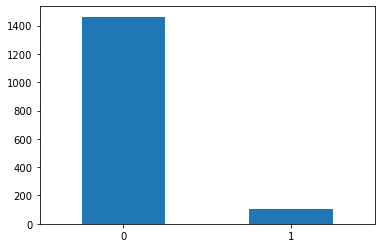

In [24]:
signalDF['Pass/Fail'].value_counts().plot(kind='bar',rot=0)

C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1) # Splitting data into 80% train and 20% test


In [26]:
print(np.round((len(X_train)/len(signalDF.index)) * 100,2), "% data is in training set")
print(np.round((len(X_test)/len(signalDF.index)) * 100,2), "% data is in test set")

79.96 % data is in training set
20.04 % data is in test set


In [27]:
print("Original Fail yield of a process entity values    : {0} ({1:0.2f}%)".format(len(signalDF.loc[signalDF['Pass/Fail'] == 1]), (len(signalDF.loc[signalDF['Pass/Fail'] == 1])/len(signalDF.index)) * 100))
print("Original Pass yield of a process entity values   : {0} ({1:0.2f}%)".format(len(signalDF.loc[signalDF['Pass/Fail'] == 0]), (len(signalDF.loc[signalDF['Pass/Fail'] == 0])/len(signalDF.index)) * 100))
print("")
print("Training Fail yield of a process entity values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Pass yield of a process entity values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Fail yield of a process entity values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Pass yield of a process entity values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Fail yield of a process entity values    : 104 (6.64%)
Original Pass yield of a process entity values   : 1463 (93.36%)

Training Fail yield of a process entity values    : 84 (6.70%)
Training Pass yield of a process entity values   : 1169 (93.30%)

Test Fail yield of a process entity values        : 20 (6.37%)
Test Pass yield of a process entity values       : 294 (93.63%)



D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

In [455]:
signalDF.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.8400,3056.5400,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.9100,2538.7450,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.9556,2218.0555,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.3538,1590.1699,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.3171,1.5296,1114.5366
...,...,...,...,...,...,...,...,...
583,1567.0,0.015318,0.017174,0.0060,0.01160,0.0138,0.0165,0.4766
586,1567.0,0.021458,0.012354,-0.0169,0.01345,0.0205,0.0276,0.1028
587,1567.0,0.016475,0.008805,0.0032,0.01060,0.0148,0.0203,0.0799
589,1567.0,99.670066,93.861936,0.0000,44.36860,72.0230,114.7497,737.3048


In [456]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1253.0,3013.866452,71.637227,2770.4000,2965.5200,3012.1800,3056.5800,3282.8700
1,1253.0,2496.629929,79.603283,2158.7500,2451.8500,2499.1500,2539.5900,2846.4400
2,1253.0,2201.290846,29.751316,2060.6600,2182.6222,2201.5777,2218.7889,2315.2667
3,1253.0,1403.256325,443.015123,0.0000,1083.3937,1298.8207,1593.1220,3619.7397
4,1253.0,4.908578,62.724442,0.6815,1.0204,1.3171,1.5334,1114.5366
...,...,...,...,...,...,...,...,...
582,1253.0,0.500019,0.003460,0.4778,0.4979,0.5001,0.5023,0.5098
583,1253.0,0.015418,0.019030,0.0060,0.0116,0.0137,0.0164,0.4766
586,1253.0,0.021677,0.012574,-0.0060,0.0134,0.0205,0.0278,0.1028
587,1253.0,0.016635,0.009107,0.0032,0.0105,0.0149,0.0207,0.0799


In [457]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
0,314.0,3016.793067,80.497290,2743.2400,2970.187500,3010.200000,3055.405000,3356.350000
1,314.0,2492.738887,82.729572,2221.1000,2456.190000,2495.850231,2535.062500,2839.460000
2,314.0,2197.580310,27.701016,2060.6600,2178.700000,2200.066600,2214.019475,2315.266700
3,314.0,1368.923568,425.863284,847.7976,1084.377900,1244.559650,1569.781450,3715.041700
4,314.0,1.357553,0.537147,0.7217,0.981600,1.317100,1.512200,4.197013
...,...,...,...,...,...,...,...,...
582,314.0,0.500404,0.003151,0.4924,0.498125,0.500600,0.502500,0.509800
583,314.0,0.014917,0.005194,0.0065,0.011525,0.014050,0.016900,0.046200
586,314.0,0.020588,0.011414,-0.0169,0.013925,0.020450,0.027225,0.102800
587,314.0,0.015835,0.007456,0.0048,0.010800,0.014100,0.018975,0.044300


5. Model training, testing and tuning: [20 Marks]  
A. Use any Supervised Learning technique to train a model. [2 Marks]

In [28]:
clf = SVC()  
clf.fit(X_train , y_train)

SVC()

In [29]:
print(clf.score(X_test, y_test))
y_predicted = clf.predict(X_test)

0.9363057324840764


In [30]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted, labels=[0,1]))

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       294
           1       0.00      0.00      0.00        20

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314



/Users/vamshika/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vamshika/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vamshika/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


B. Use cross validation techniques. [3 Marks]  
Hint: Use all CV techniques that you have learnt in the course.

In [33]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
results = cross_val_score(SVC(gamma=0.025, C=3) , X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[1.         0.9375     0.9375     0.96875    0.96875    0.90625
 0.9375     0.96875    0.96875    1.         0.9375     0.875
 1.         0.9375     0.875      1.         0.9375     0.93548387
 0.87096774 0.93548387 0.83870968 0.93548387 0.93548387 0.93548387
 0.93548387 1.         1.         0.90322581 0.93548387 0.93548387
 0.87096774 0.87096774 0.93548387 0.87096774 0.93548387 0.80645161
 0.87096774 0.96774194 0.90322581 1.         0.96774194 0.90322581
 0.96774194 0.93548387 0.83870968 0.90322581 0.87096774 1.
 1.         1.        ]
Accuracy: 93.345% (4.933%)


In [34]:
loocv = LeaveOneOut()
results = cross_val_score(SVC(gamma=0.025, C=3) , X, y, cv=loocv)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1. 1. 0. ... 1. 1. 1.]
Accuracy: 93.363% (24.893%)


In [35]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
results = cross_val_score(SVC(gamma=0.025, C=3) , X, y, cv=skf)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.93630573 0.93630573 0.93630573 0.92993631 0.92993631 0.92993631
 0.92993631 0.93589744 0.93589744 0.93589744]
Accuracy: 93.364% (0.302%)


C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]  
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies. 

In [36]:
print(SVC().get_params() )

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [39]:
hyperparameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid','poly']}

#Use GridSearch
gridSearch = GridSearchCV(SVC() , hyperparameters, cv=5, verbose=2, n_jobs=-1)

In [42]:
#gridSearch = RandomizedSearchCV(svm.SVC() , hyperparameters, cv=5, verbose=2, n_jobs=-1)
#from imblearn.under_sampling import RandomUnderSampler
#rd_sam= RandomUnderSampler(sampling_strategy=0.5)
#X_rd_sam, y_rd_sam= rd_sam.fit_resample(X_train, y_train)

#Fit the model
#optimal_model = gridSearch.fit(X_rd_sam,y_rd_sam)

#Print The value of best Hyperparameters

#print('Optimal parameters:', optimal_model.best_params_)*/


In [43]:
#Fit the model
optimal_model = gridSearch.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


In [44]:
#Print The value of best Hyperparameters

print('Optimal parameters:', optimal_model.best_params_)

Optimal parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [46]:
svm_hp = SVC(kernel='rbf', C=0.1, gamma=1,probability=True) 
  
# fitting x samples and y classes 
svm_hp.fit(X_train, y_train) 

SVC(C=0.1, gamma=1, probability=True)

In [47]:
y_predict_hp = svm_hp.predict(X_test)

In [48]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_hp, labels=[0,1]))

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       294
           1       0.00      0.00      0.00        20

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314



/Users/vamshika/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vamshika/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vamshika/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


D. Use any other technique/method which can enhance the model performance. [4 Marks]  
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.  

In [50]:
import warnings
warnings.filterwarnings('ignore') 

In [53]:
balancer_smote = SMOTE(random_state = 1, sampling_strategy=0.5)
X_train_sm, y_train_sm = balancer_smote.fit_resample(X_train, y_train)

In [74]:
pca = PCA(n_components=10)
pca.fit(X_train_sm)
X_train_pca = pca.transform(X_train_sm)
X_test_pca = pca.transform(X_test)

#pca.fit(X_train_sm)
#X_train_pca = pca.transform(X_train_sm)
#X_test_pca = pca.transform(X_test)
#print(pca.explained_variance_ratio_)
#print(np.cumsum(pca.explained_variance_ratio_))

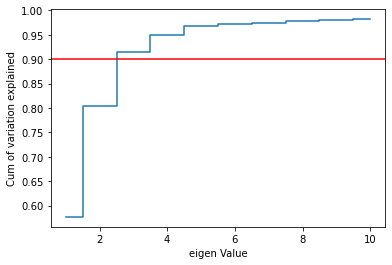

In [75]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.show()

In [64]:
pca4 = PCA(n_components=4)
pca4.fit(X_train_sm)
Xpca4_train = pca4.transform(X_train_sm)
Xpca4_test = pca4.transform(X_test)
print(pca4.explained_variance_ratio_)
print(np.cumsum(pca4.explained_variance_ratio_))

[0.57689849 0.22814856 0.108808   0.03544751]
[0.57689849 0.80504705 0.91385506 0.94930256]


In [68]:
svm_pca = SVC(kernel='rbf',probability=True) 
  
# fitting x samples and y classes 
svm_pca.fit(Xpca4_train, y_train_sm) 

ypca4_predict_train = svm_pca.predict(Xpca4_test)

In [69]:
print("Classification Report")
print(metrics.classification_report(y_test, ypca4_predict_train, labels=[0,1]))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       294
           1       0.08      0.05      0.06        20

    accuracy                           0.90       314
   macro avg       0.51      0.50      0.50       314
weighted avg       0.88      0.90      0.89       314



In [417]:
svm_pca = svm.SVC(kernel='rbf', C=0.1, gamma=0.1,probability=True) 
  
# fitting x samples and y classes 
svm_pca.fit(X_train_pca, y_train_sm) 

SVC(C=0.1, gamma=0.1, probability=True)

In [418]:
y_predict_pca = svm_pca.predict(X_test_pca)

In [419]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_pca, labels=[0,1]))

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       294
           1       0.00      0.00      0.00        20

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314



/Users/vamshika/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vamshika/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vamshika/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


E. Display and explain the classification report in detail. [3 Marks]

F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]  

In [ ]:
# creatw the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())

6. Post Training and Conclusion: [5 Marks]  
A. Display and compare all the models designed with their train and test accuracies. [1 Marks]

B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks] 

C. Pickle the selected model for future use. [2 Marks] 

D. Write your conclusion on the results. [1 Marks] 